# **Voice of Brand**

Taking the Voice of Brand for our scope of study: 

* **L'Occitane en Provence**
* **Europe** and **Asia** markets: United Kingdom, Japan

**Resources:**

https://medium.com/analytics-vidhya/how-to-translate-text-with-python-9d203139dcf5

https://pypi.org/project/deep-translator/

https://portal.azure.com/#@studentcbs.onmicrosoft.com/resource/subscriptions/6c62dcd0-2b14-479d-87c9-291b22f1d0ab/resourceGroups/study/providers/Microsoft.CognitiveServices/accounts/studytrad/cskeys

https://docs.microsoft.com/fr-fr/azure/cognitive-services/translator/quickstart-translator?tabs=python

The goal would be to **analyse the relation between this storytelling and stakeholders voices**. In other terms, what is the role of storytelling of Brands communication:

https://medium.com/@adriensieg/text-similarities-da019229c894

https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50

## **Preparation: Libraries and functions**

In [ ]:
# Install Translation Libraries
%%capture
!pip install pip install deep-translator
!pip install deepl

In [ ]:
#import the necessary libraries
import os
import time

# Computations
import numpy as np
import pandas as pd
import math

# Text Analytics
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# DeepL and Deep Translation
import deepl
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             MicrosoftTranslator,
                             single_detection,
                             batch_detection)

# Microsoft Translation
import requests, uuid, json

# Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

# Scraping
from bs4 import BeautifulSoup
import urllib
from urllib.request import Request, urlopen
import requests

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Clean the text

# Create a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #Revoming @mentions
  text = re.sub(r'#', '', text) # Removing the '#' simbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link
  text = text.lower() # make text lowercase
  text = re.sub('\[.*?\]', '', text) # removing text within brackets
  text = re.sub('\(.*?\)', '', text) # removing text within parentheses
  text = re.sub('\w*\d\w*', '', text) # removing numbers
  text = re.sub('\s+', ' ', text) # if there's more than 1 whitespace, then make it just 1
  text = re.sub('\n', ' ', text) # if there's a new line, then make it a whitespace
  text = re.sub('\"+', '', text) # removing any quotes
  text = re.sub('(\&amp\;)', '', text) # removing &amp;
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Get rid of all punctuation
  text = re.sub('(httptco)', '', text) # getting rid of `httptco`
  text = re.sub(r'[^\w\s]', '',text) # remove other punctuation

  return text

In [ ]:
# Define Microsoft Translation function 

def microsoft_translate(text):
  # Add your subscription key and endpoint
  subscription_key = "XXXXXXXXXXXXXXXXXXXXXX"
  endpoint = "https://api.cognitive.microsofttranslator.com"

  # Add your location, also known as region. The default is global.
  # This is required if using a Cognitive Services resource.
  location = "westeurope"

  path = '/translate'
  constructed_url = endpoint + path

  params = {
      'api-version': '3.0',
      'to': 'en'
  }

  headers = {
      'Ocp-Apim-Subscription-Key': subscription_key,
      'Ocp-Apim-Subscription-Region': location,
      'Content-type': 'application/json',
      'X-ClientTraceId': str(uuid.uuid4())
  }

  # You can pass more than one object in body.
  body = [{
      'text': str(text)
  }]

  request = requests.post(constructed_url, params=params, headers=headers, json=body)
  response = request.json()

  print(json.dumps(response, sort_keys=True, ensure_ascii=False, indent=4, separators=(',', ': ')))

  return response[0]['translations'][0]['text']

## **L'Occitane en Provence**

In [ ]:
# Scrape Voice UK
url = "https://uk.loccitane.com/we-are-cultivators-of-change,83,1,87328,1720417.htm"

headers = {"user-agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0"}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, "html.parser")

texts = soup.find_all("p")

occ_voice_uk = " ".join([text.text for text in texts])

In [ ]:
# Scrape Voice JP
url = "https://jp.loccitane.com/about-us"

headers = {"user-agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0"}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, "html.parser")

texts = soup.find_all("p")

occ_voice_jp = " ".join([text.text for text in texts])

In [ ]:
# Clean Text 
occ_voice_uk = cleanTxt(occ_voice_uk)
occ_voice_jp = cleanTxt(occ_voice_jp)

# Print the Results 
print(occ_voice_uk)
print()
print(occ_voice_jp)

since  loccitane en provence has been imagining producing and selling beauty skincare and wellbeing products with an intention to share natures wonders with the world our ambition is to not only sustain lands but to regenerate ecosystems we believe beauty goes beyond what the eye can see from seed to skin we are holistic in our approach at loccitane en provence weve always been cultivators of change this mindset is nothing new we do our best to create positive change for the world and we always try to inspire everyone around us to do the same let us tell you our story through one year every year we plant powerful ingredients that are in perfect symbiosis with their ecosystems we turn to mother earth and marvel at her in bloom we explore her treasures and investigate our own methods until new breakthroughs are revealed we craft them into unexpected memories we team up with people at a local level because we believe that any act can make a difference no matter how big or small we believe

In [ ]:
# Translate JP text 
translator = deepl.Translator("XXXXXXXXXXXXXXXXXXXXXX:fx")

occ_voice_jp = translator.translate_text(occ_voice_jp, target_lang="EN-GB")
occ_voice_jp = cleanTxt(occ_voice_jp.text)
print(occ_voice_jp)

 add to cart see more info add to cart see more info add to cart see more info add to cart see more info add to cart globalbrowsertoolscheckjavascript all beaussant had was an old distiller a small truck and a wealth of knowledge about plants from growing immortelle in corsica to cultivating lavender in provence this is how loccitanes history began loccitane offers high quality products developed according to the principles of phytotherapy and aromatherapy loccitane has established strict formulation standards to maintain efficacy and comfort these are not just policies but loccitane commitments that have influenced many important decisions over the years the loccitane brand is given life and meaning and purpose loccitane offers a wide range of face treatments body treatments and massages all handoverhand treatments based on natural ingredients and a unique way of life a pioneering skincare brand based on botanical ingredients and essential oils the kit allows you to handdeliver your o

In [ ]:
# Get Sentiment of UK Voice

# Get the subjectivity with TextBlob
print(TextBlob(occ_voice_uk).sentiment.subjectivity)

# Get the polarity with TextBlob
print(TextBlob(occ_voice_uk).sentiment.polarity)

# Get VADER Sentiment Analysis

analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(occ_voice_uk))

0.5867243867243866
0.2315205627705628
{'neg': 0.01, 'neu': 0.772, 'pos': 0.218, 'compound': 0.9992}


In [ ]:
# Get Sentiment of JP Voice

# Get the subjectivity with TextBlob
print(TextBlob(occ_voice_jp).sentiment.subjectivity)

# Get the polarity with TextBlob
print(TextBlob(occ_voice_jp).sentiment.polarity)

# Get VADER Sentiment Analysis

analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(occ_voice_jp))

0.4626315789473684
0.24000000000000002
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.9451}


<function matplotlib.pyplot.show>

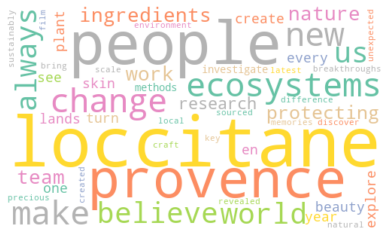

In [ ]:
# Plot UK Voice Word Cloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(occ_voice_uk)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

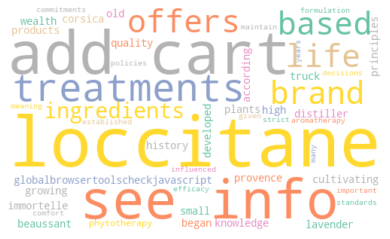

In [ ]:
# Plot JP Voice Word Cloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(occ_voice_jp)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

## **Erborian**

In [ ]:
# Scrape Voice UK
url = "https://uk.erborian.com/about-erborian,7,1,408,31049.htm"

headers = {"user-agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0"}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, "html.parser")

texts = soup.find_all("p")

erb_voice_uk = " ".join([text.text for text in texts])

In [ ]:
# Scrape Voice KR
url = "https://kr.erborian.com/about-us,2,2,1331,37082.htm"

headers = {"user-agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0"}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, "html.parser")

texts = soup.find_all("p")

erb_voice_kr = " ".join([text.text for text in texts])

In [ ]:
# Clean Text 
erb_voice_uk = cleanTxt(erb_voice_uk)
erb_voice_kr = cleanTxt(erb_voice_kr)

# Print the Results 
print(erb_voice_uk)
print()
print(erb_voice_kr)

globalbrowsertoolscheckjavascript your beauty routine for a refined skin texture free with any  purchase code babyskin  sign up for our newsletter and enjoy  off and free standard delivery for your first order  when erborian launched in  our goal was simple to create innovative and impactful products that enrich your routine whilst simultaneously ensuring you get the best out of your skin all in the least amount of stepsfrom your morning moisturiser to your nightly cleanse and everything inbetween years later our core values remain unchanged we aim to provide you with unique and easytouse products that promise to always put you and your skin first weve created hybrid products that perfectly combine skincare and makeup like our iconic bb and cc creams your skin has more potential than you may think at erborian we believe that your skin deserves so much more than just being covered up we are convinced that loving your skin is one of the first steps towards greater selfconfidence we promi

In [ ]:
# Translate KR text 
erb_voice_kr = microsoft_translate(str(erb_voice_kr))
erb_voice_kr = cleanTxt(erb_voice_kr)
erb_voice_kr

[
    {
        "detectedLanguage": {
            "language": "ko",
            "score": 0.95
        },
        "translations": [
            {
                "text": " Herborien's website uses cookies to provide the best possible service Download cookies for smooth use Roxy Land Group's global skincare brand Herbes dorient stands for Asian herbs Herbes dorient Throughout its long history, Herbes dorient stands for Asian herbs Herbal ingredients from Korea that have been used as herbs and French know-how and flair are added to close the gap between skincare and makeup Meet the simple and unique Parisian beauty that will create beautiful skin Ingredients Thousands of years of proven efficacy Korean herbal ingredients and botanicals such as citron bamboo, including ginseng, are not a burden on the skin. Perfect skin Ingredients found in nature and the power of kbeauty combine to create a unique product unique to Herborien Hybrid products that combine absorbent and rubbing textures with

' herboriens website uses cookies to provide the best possible service download cookies for smooth use roxy land groups global skincare brand herbes dorient stands for asian herbs herbes dorient throughout its long history herbes dorient stands for asian herbs herbal ingredients from korea that have been used as herbs and french knowhow and flair are added to close the gap between skincare and makeup meet the simple and unique parisian beauty that will create beautiful skin ingredients thousands of years of proven efficacy korean herbal ingredients and botanicals such as citron bamboo including ginseng are not a burden on the skin perfect skin ingredients found in nature and the power of kbeauty combine to create a unique product unique to herborien hybrid products that combine absorbent and rubbing textures with the features of skincare makeup give busy modern women a smart lifestyle share a moment with erborian herborien join community on instagram or facebook to share your favorite 

In [ ]:
# Get Sentiment of UK Voice

# Get the subjectivity with TextBlob
print(TextBlob(erb_voice_uk).sentiment.subjectivity)

# Get the polarity with TextBlob
print(TextBlob(erb_voice_uk).sentiment.polarity)

# Get VADER Sentiment Analysis

analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(erb_voice_uk))

0.49861459203564484
0.2717836257309942
{'neg': 0.038, 'neu': 0.792, 'pos': 0.171, 'compound': 0.9975}


In [ ]:
# Get Sentiment of KR Voice

# Get the subjectivity with TextBlob
print(TextBlob(erb_voice_kr).sentiment.subjectivity)

# Get the polarity with TextBlob
print(TextBlob(erb_voice_kr).sentiment.polarity)

# Get VADER Sentiment Analysis

analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(erb_voice_kr))

0.5421052631578948
0.28101503759398494
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9885}


<function matplotlib.pyplot.show>

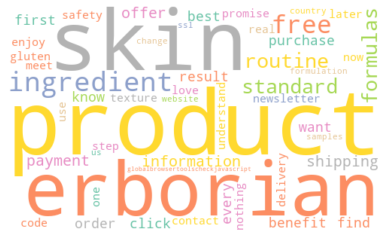

In [ ]:
# Plot UK Voice Word Cloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(erb_voice_uk)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

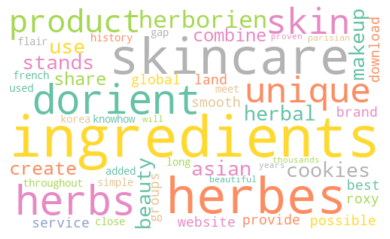

In [ ]:
# Plot KR Voice Word Cloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(erb_voice_kr)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

## **Save Voices of Brands**

In [ ]:
with open("/content/drive/MyDrive/Kedge Thesis: Voice of Stakeholders/Brand/occ_voice_uk.txt", "w") as text_file:
    text_file.write(occ_voice_uk)

with open("/content/drive/MyDrive/Kedge Thesis: Voice of Stakeholders/Brand/occ_voice_jp.txt", "w") as text_file:
    text_file.write(str(occ_voice_jp))

with open("/content/drive/MyDrive/Kedge Thesis: Voice of Stakeholders/Brand/erb_voice_uk.txt", "w") as text_file:
    text_file.write(erb_voice_uk)

with open("/content/drive/MyDrive/Kedge Thesis: Voice of Stakeholders/Brand/erb_voice_kr.txt", "w") as text_file:
    text_file.write(str(erb_voice_kr))